In [1]:
1 + 3

4

In [6]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


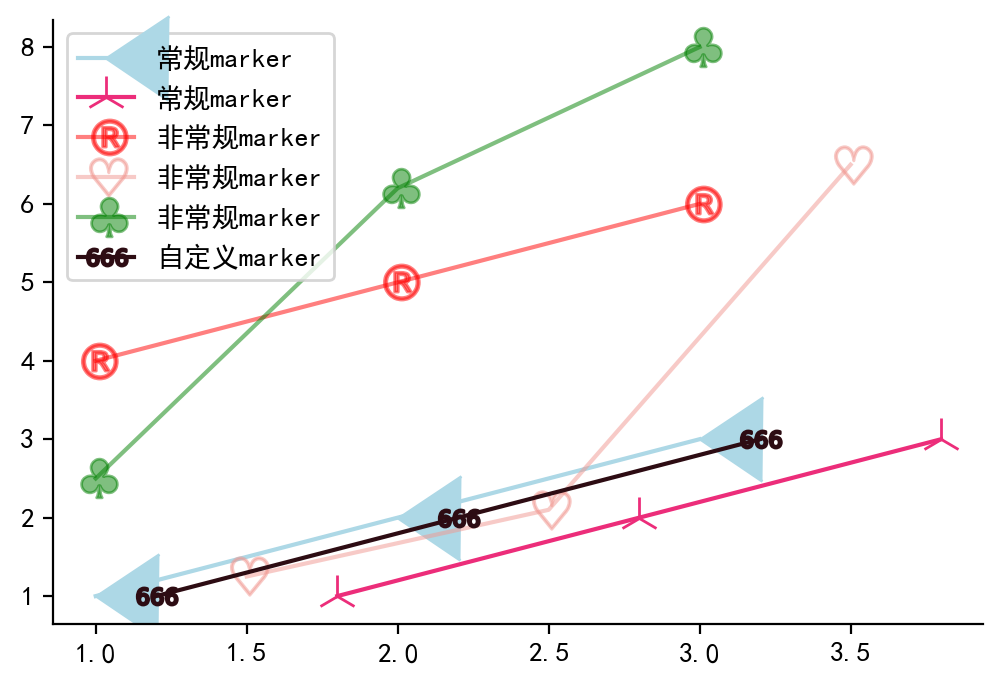

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示中文
plt.figure(dpi=200)
#常规marker使用
plt.plot([1,2,3],[1,2,3],marker=4, markersize=30, color='lightblue',label='常规marker')
plt.plot([1.8,2.8,3.8],[1,2,3],marker='2', markersize=15, color='#ec2d7a',label='常规marker')

#非常规marker使用
#注意使用两个$符号包围名称
plt.plot([1,2,3],[4,5,6],marker='$\circledR$', markersize=15, color='r', alpha = 0.5 ,label='非常规marker')
plt.plot([1.5,2.5,3.5],[1.25,2.1,6.5],marker='$\heartsuit$', markersize=15, color='#f19790', alpha=0.5,label='非常规marker')
plt.plot([1,2,3],[2.5,6.2,8],marker='$\clubsuit$', markersize=15, color='g', alpha=0.5,label='非常规marker')

#自定义marker
plt.plot([1.2,2.2,3.2],[1,2,3],marker=r"$666$", markersize=15, color='#2d0c13',label='自定义marker')
plt.legend(loc='upper left')
for i in ['top','right']:
    plt.gca().spines[i].set_visible(False)

In [1]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


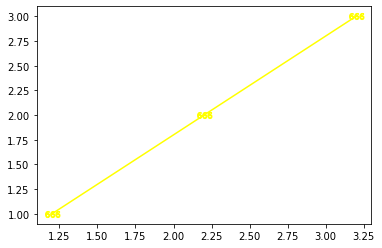

In [5]:
import matplotlib.pyplot as plt
#color='#2d0c13'
plt.plot([1.2,2.2,3.2],[1,2,3],marker=r"$666$", markersize=15, color='yellow',label='自定义marker')

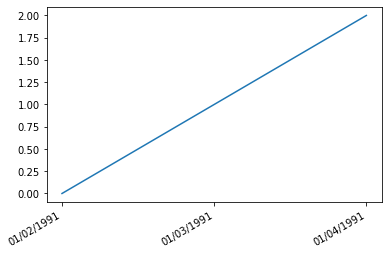

In [6]:
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# 生成横纵坐标信息
dates = ['01/02/1991', '01/03/1991', '01/04/1991']
xs = [datetime.strptime(d, '%m/%d/%Y').date() for d in dates]
ys = range(len(xs))
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, ys)
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.show()


25
x =  [17167. 17182. 17197. 17212. 17227. 17242. 17257. 17272. 17287. 17302.
 17317. 17332. 17347. 17362. 17377. 17392. 17407. 17422. 17437. 17452.
 17467. 17482. 17497. 17512. 17527.]


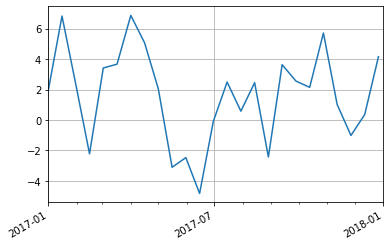

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

"""生成数据"""
#beginDate = '2012-01-01'
beginDate = '2017-01-01'
endDate = '2018-01-01'

# 将日期字符串转化为数字（从1970-01-01算起的天数差）
x = np.arange(mdates.datestr2num(beginDate), mdates.datestr2num(endDate), 15)
print(len(x))
print('x = ',  x)
y = np.random.randn(len(x))*3+2

data = {}
# 将数字（天数差）转为日期对象 numpy.datetime64
data['date'] = [np.datetime64(int(c), 'D') for c in x]
data['value'] = y
#ax.plot('date', 'value', data=data) 
ax.plot(data['date'], data['value']) # 与前一行是等效的


"""设置坐标轴的格式"""
# 设置主刻度, 每6个月一个刻度
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# 设置次刻度，每个月一个刻度
fmt_month = mdates.MonthLocator() # 默认即可
ax.xaxis.set_minor_locator(fmt_month)

# 设置 x 坐标轴的刻度格式
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 设置横坐标轴的范围
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# 设置刻度的显示格式
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x : f'$x:.2f$'
ax.grid(True)

"""自动调整刻度字符串"""
# 自动调整 x 轴的刻度字符串（旋转）使得每个字符串有足够的空间而不重叠
fig.autofmt_xdate() 

plt.show()


In [17]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [19]:
a = np.arange(5, 10)
a

array([5, 6, 7, 8, 9])

In [21]:
a = np.arange(5, 20, 3)
a

array([ 5,  8, 11, 14, 17])

In [23]:
a = matplotlib.dates.datestr2num('2021-12-23') # 将日期转化为天数差
a

18984.0

In [24]:
a = matplotlib.dates.datestr2num('2021-12-24') # 将日期转化为天数差
a

18985.0

In [29]:
data['date']

[numpy.datetime64('2017-01-01'),
 numpy.datetime64('2017-01-16'),
 numpy.datetime64('2017-01-31'),
 numpy.datetime64('2017-02-15'),
 numpy.datetime64('2017-03-02'),
 numpy.datetime64('2017-03-17'),
 numpy.datetime64('2017-04-01'),
 numpy.datetime64('2017-04-16'),
 numpy.datetime64('2017-05-01'),
 numpy.datetime64('2017-05-16'),
 numpy.datetime64('2017-05-31'),
 numpy.datetime64('2017-06-15'),
 numpy.datetime64('2017-06-30'),
 numpy.datetime64('2017-07-15'),
 numpy.datetime64('2017-07-30'),
 numpy.datetime64('2017-08-14'),
 numpy.datetime64('2017-08-29'),
 numpy.datetime64('2017-09-13'),
 numpy.datetime64('2017-09-28'),
 numpy.datetime64('2017-10-13'),
 numpy.datetime64('2017-10-28'),
 numpy.datetime64('2017-11-12'),
 numpy.datetime64('2017-11-27'),
 numpy.datetime64('2017-12-12'),
 numpy.datetime64('2017-12-27')]

In [30]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-
# __author__ = "TKQ"

import time

# 生成timestamp
time.time()
# 1477471508.05#struct_time to timestamptime.mktime(time.localtime())
#生成struct_time
# timestamp to struct_time 本地时间
time.localtime()
time.localtime(time.time())
# time.struct_time(tm_year=2016, tm_mon=10, tm_mday=26, tm_hour=16, tm_min=45, tm_sec=8, tm_wday=2, tm_yday=300, tm_isdst=0)

# timestamp to struct_time 格林威治时间
time.gmtime()
time.gmtime(time.time())
# time.struct_time(tm_year=2016, tm_mon=10, tm_mday=26, tm_hour=8, tm_min=45, tm_sec=8, tm_wday=2, tm_yday=300, tm_isdst=0)

#format_time to struct_time
time.strptime('2011-05-05 16:37:06', '%Y-%m-%d %X')
# time.struct_time(tm_year=2011, tm_mon=5, tm_mday=5, tm_hour=16, tm_min=37, tm_sec=6, tm_wday=3, tm_yday=125, tm_isdst=-1)

#生成format_time
#struct_time to format_time
time.strftime("%Y-%m-%d %X")
time.strftime("%Y-%m-%d %X",time.localtime())
# 2016-10-26 16:48:41


#生成固定格式的时间表示格式
time.asctime(time.localtime())
time.ctime(time.time())
# Wed Oct 26 16:45:08 2016

'Thu Dec 23 19:18:27 2021'

In [31]:
time.time()

1640258371.7676084

In [32]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=23, tm_hour=19, tm_min=20, tm_sec=3, tm_wday=3, tm_yday=357, tm_isdst=0)

In [33]:
time.localtime(time.time())

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=23, tm_hour=19, tm_min=20, tm_sec=38, tm_wday=3, tm_yday=357, tm_isdst=0)

In [34]:
time.gmtime()

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=23, tm_hour=11, tm_min=21, tm_sec=26, tm_wday=3, tm_yday=357, tm_isdst=0)

In [35]:
time.strptime('2011-05-05 16:37:06', '%Y-%m-%d %X')

time.struct_time(tm_year=2011, tm_mon=5, tm_mday=5, tm_hour=16, tm_min=37, tm_sec=6, tm_wday=3, tm_yday=125, tm_isdst=-1)

In [39]:
time.strftime("%Y-%m-%d")

'2021-12-23'

In [43]:
time.strftime("%m.%d",time.localtime())

'12.23'

In [38]:
time.asctime(time.localtime())

'Thu Dec 23 19:24:17 2021'

In [45]:
t1 = datetime.time(10,23,15)#time对象t1.hour、t1.minute、t1.second、t1.microsecond：时、分、秒、微秒；
t1.tzinfo#：时区信息；
t1.replace([ hour[ , minute[ , second[ , microsecond[ , tzinfo] ] ] ] ] )#：创建一个新的时间对象，用参数指定的时、分、秒、微秒代替原有对象中的属性（原有对象仍保持不变）；
t1.isoformat()#：返回型如"HH:MM:SS"格式的字符串表示；
t1.strftime(fmt)#：同time模块中的format；

SyntaxError: invalid syntax (Temp/ipykernel_20132/1147733004.py, line 3)

In [46]:
t1 = datetime.time(10,23,15)

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [48]:
ls = [1, 2, 3]
print(3 not in ls)

False
